<a href="https://colab.research.google.com/github/HimanshuAnuragi/HimanshuAnuragi/blob/main/TSW_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve

import matplotlib.pyplot as plt

# Set how many rows and columns to display by default, 'None' for all
pd.set_option('max_rows', 8)
pd.set_option('max_columns', None)

# Bagging Classifier

In [ ]:
# Import the Iris plants dataset
iris = datasets.load_iris()
x = StandardScaler().fit_transform(iris.data)
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

print('Train Data - ', x_train.shape, y_train.shape)
print('Test Data  - ', x_test.shape, y_test.shape)

Train Data -  (105, 4) (105,)
Test Data  -  (45, 4) (45,)


In [ ]:
# Train Bagging classifier

#from sklearn.svm import SVC
#bag_clf = BaggingClassifier(SVC(kernel='poly'), n_estimators=500, max_samples=100, bootstrap=True)

#from sklearn.linear_model import LogisticRegression
#bag_clf = BaggingClassifier(LogisticRegression(), n_estimators=500, max_samples=100, bootstrap=True)

#from sklearn.neighbors import KNeighborsClassifier
#bag_clf = BaggingClassifier(KNeighborsClassifier(), n_estimators=500, max_samples=100, bootstrap=True)

# from sklearn.naive_bayes import GaussianNB
# bag_clf = BaggingClassifier(GaussianNB(), n_estimators=500, max_samples=100, bootstrap=True)

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, max_samples=100)
bag_clf.fit(x_train, y_train)

# Predict test data
y_pred = bag_clf.predict(x_test)
print('Accuracy - ', accuracy_score(y_test, y_pred))

Accuracy -  0.9111111111111111


### Visualization

In [ ]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=400, noise=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)
print('DTree   - ', accuracy_score(y_test, y_pred_tree))

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, max_samples=100)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
print('Bagging - ', accuracy_score(y_test, y_pred))

#####################################################

# tree_clf = SVC(kernel='rbf', random_state=42)
# tree_clf.fit(x_train, y_train)
# y_pred_tree = tree_clf.predict(x_test)
# print('DTree   - ', accuracy_score(y_test, y_pred_tree))

# bag_clf = BaggingClassifier(SVC(kernel='rbf'), n_estimators=500, bootstrap=True, max_samples=100, bootstrap=True)
# bag_clf.fit(x_train, y_train)
# y_pred = bag_clf.predict(x_test)
# print('Bagging - ', accuracy_score(y_test, y_pred))

DTree   -  0.89
Bagging -  0.92


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

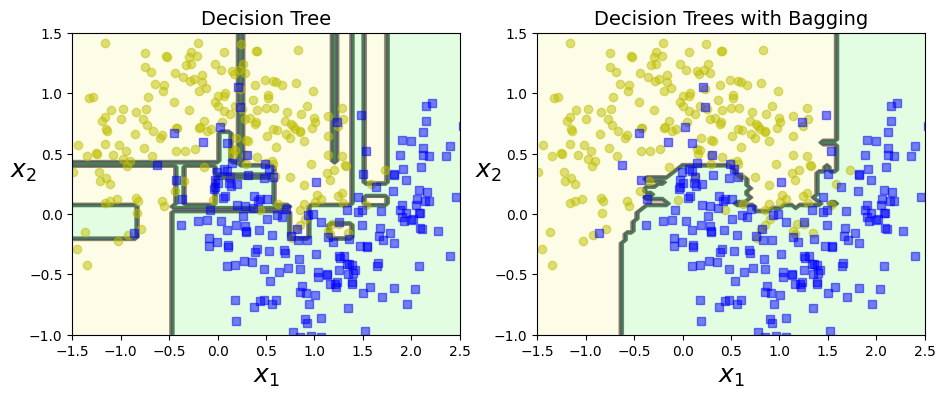

In [ ]:
plt.figure(dpi=100, figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, x, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, x, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

# Random Forest

In [ ]:
# Import the Iris plants dataset
iris = datasets.load_iris()

# Train:Test (70:30) Split (0-3)
# x = iris.data
x = StandardScaler().fit_transform(iris.data)
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

print('Train Data - ', x_train.shape, y_train.shape)
print('Test Data  - ', x_test.shape, y_test.shape)

Train Data -  (105, 4) (105,)
Test Data  -  (45, 4) (45,)


In [ ]:
# Train the Random Forest classification model

rfclf = RandomForestClassifier(n_estimators=100, criterion='gini', 
                               bootstrap=True, max_depth=None).fit(x_train, y_train)

print('Base Estimator (DT Classifier)')
print(rfclf.base_estimator_)
print()
print('Estimators (DT Classifiers)')
print(len(rfclf.estimators_))
# print(rfclf.estimators_)

Base Estimator (DT Classifier)
DecisionTreeClassifier()

Estimators (DT Classifiers)
100


In [ ]:
print('Estimator Tree Depths')
for i in range(100):
  print(rfclf.estimators_[i].get_depth(), end=' ')

print()
for i in range(5):
  print()
  # print(rfclf.estimators_[i].n_classes_)
  # print(rfclf.estimators_[i].n_features_in_)
  print(rfclf.estimators_[i].feature_importances_)

Estimator Tree Depths
4 3 4 5 5 3 4 3 4 3 3 2 3 4 5 5 3 3 2 4 5 3 4 6 4 3 4 4 5 4 4 4 4 6 4 4 5 5 4 3 4 6 3 3 3 6 4 5 4 3 3 2 4 4 4 3 4 3 3 3 4 3 7 5 5 5 3 4 3 3 4 3 2 4 3 3 4 4 5 3 2 3 4 5 3 4 2 4 3 3 4 4 4 5 3 2 3 4 4 3 

[0.02799882 0.         0.44584759 0.52615359]

[0.         0.         0.61504992 0.38495008]

[0.         0.00277778 0.525      0.47222222]

[0.02591153 0.00238157 0.93672633 0.03498057]

[0.36690385 0.04899794 0.36926515 0.21483306]


In [ ]:
# Predict test data
y_pred = rfclf.predict(x_test)
print('Accuracy - ', accuracy_score(y_test, y_pred))

Accuracy -  0.9111111111111111


In [ ]:
# Sample Output

print('Data    - ', x_test[30])
print('Label   - ', y_test[30])
print('Predict - ', rfclf.predict(x_test[30].reshape(1, -1))) # Send data to predict as a single sample
print()

samData = np.array([1.20, -0.3, 0.22, 0.15])
print('Data    - ', samData)
print('Predict - ', rfclf.predict(samData.reshape(1, -1)))

Data    -  [ 1.15917263 -0.13197948  0.99010798  1.18556721]
Label   -  2
Predict -  [2]

Data    -  [ 1.2  -0.3   0.22  0.15]
Predict -  [1]


### Out of Bag Evaluation

In [ ]:
print(x_train.shape, x_test.shape)

(105, 4) (45, 4)


In [ ]:
oob_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=0.8, bootstrap=True, oob_score=True)
oob_clf.fit(x_train, y_train)
print('OOB Score - ', oob_clf.oob_score_)

#y_pred = oob_clf.predict(x_test)
print('Accuracy  - ', accuracy_score(y_test, y_pred))

#print(len(oob_clf.estimators_samples_[0]))
#for i in range(500):
  #print(oob_clf.estimators_samples_[i])
#  print(oob_clf.estimators_[i].predict(x_test[1].reshape(1,-1)))

OOB Score -  0.9809523809523809
Accuracy  -  0.9111111111111111


In [ ]:
a, b = oob_clf.estimators_samples_[0], oob_clf.estimators_samples_[1]

print(len(np.intersect1d(a, b)))
print(np.intersect1d(a, b))

31
[  0   2   3   4   6   7  12  13  14  17  27  29  30  33  35  40  45  52
  56  57  66  68  74  78  81  89  90  96  99 100 104]


In [ ]:
rf_oob_clf = RandomForestClassifier(n_estimators=100, criterion='gini', 
                               bootstrap=True, oob_score=True, max_depth=None).fit(x_train, y_train)
rf_oob_clf.fit(x_train, y_train)
print('OOB Score - ', rf_oob_clf.oob_score_)

y_pred = rf_oob_clf.predict(x_test)
print('Accuracy  - ', accuracy_score(y_test, y_pred))

OOB Score -  0.9714285714285714
Accuracy  -  0.9111111111111111
